# [Chapter 8] Exploring the Ames housing data

## **DSLC stages**: EDA


In this document, you will find the PCS workflow and code for conducting a thorough EDA of the Ames housing data. Note that each section in this document corresponds to an interesting trend and finding. We did not include every exploratory avenue and every exploratory plot we made in this document. 

Following each interesting figure that we explore in this document, we conduct a PCS evaluation to demonstrate the stability, predictability of the take-away message of the figure.


We examined and cleaned the Ames housing data in the file `01_cleaning.qmd`. In each subsequent file that uses the cleaned version of the data, it is good practice to load in the original "raw" (uncleaned) data, and then clean it and pre-process it using the cleaning function you wrote. It is often helpful to keep a copy of the original uncleaned data in your environment too. 


Note that our pre-processing steps were primarily so that the data would play nice with the predictive algorithms. In general the initial clean data is useful for EDA (sometimes the pre-processed data is too, but we will focus on the clean data for now) to ensure that your perspective is not skewed by the pre-processing steps (such as imputation), but it is also helpful to explore the pre-processed data too since this is the data you will be using in your analysis. You will see us examine both datasets in this document. 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import datetime
import seaborn as sns

# define all of the objects we need
%run functions/prepare_ames_data.py

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100


## High-level summary of the data


Here are some histograms of the numeric variables (which we already saw in the cleaning doc).  


In [2]:
continuous_variables = ames_train_clean.columns[list(ames_train_clean.nunique() > 20)]

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

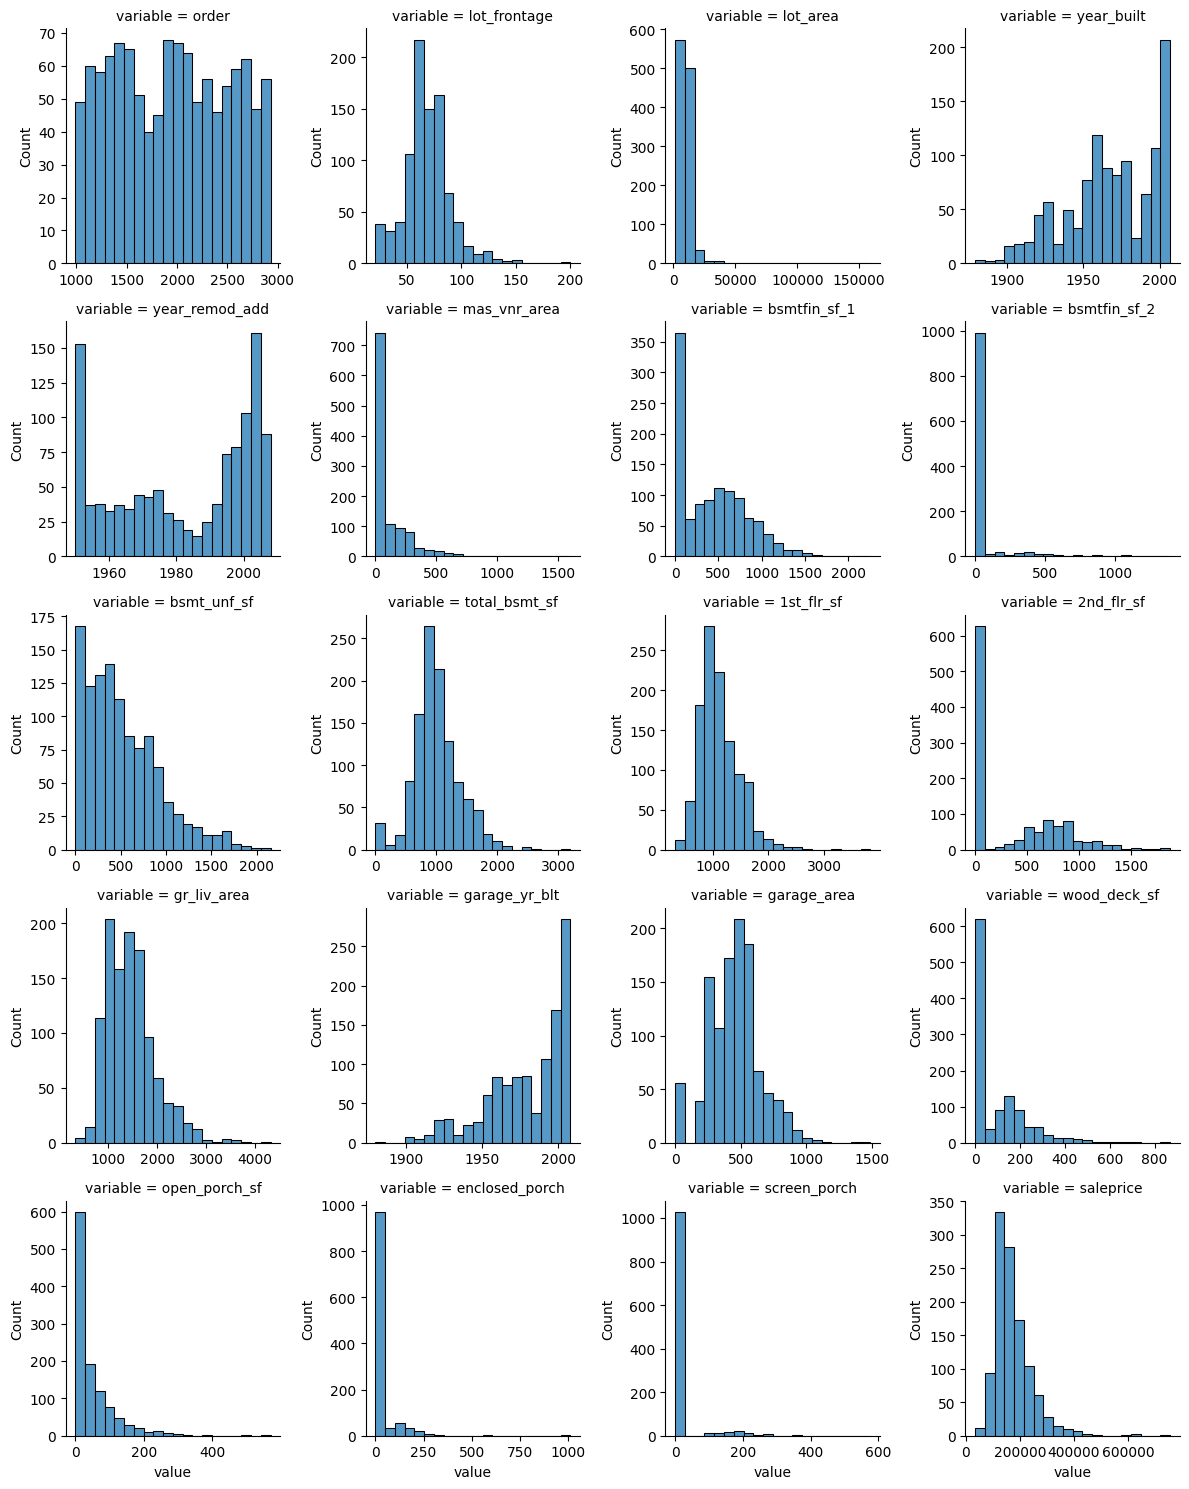

In [3]:
ames_numeric_long = ames_train_clean[continuous_variables].select_dtypes(include=np.number).melt()
g = sns.FacetGrid(ames_numeric_long, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, "value", bins=20)


The following table shows a random sample of 15 houses (this won't necessarily match the random sample that was in the book). 


In [4]:
ames_train_clean.sample(15, random_state=364)

,order,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,date
pid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
535353180,2593,190,RL,94.0,22136,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,2fmCon,1.5Fin,5,5,1925,1975,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Fa,CBlock,TA,TA,Mn,GLQ,1018,Unf,0,1153,2171,GasA,TA,Y,SBrkr,1392,1248,0,2640,2.0,0.0,2,1,5,1,TA,10,Maj1,1,Gd,Attchd,1975,RFn,3,1008,TA,TA,N,631,48,148,0,0,0,NaN,NaN,NaN,0,7,2006,WD,180000,2006-07-01
905480240,1418,50,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,Fa,Mn,LwQ,236,Rec,380,0,616,GasA,TA,N,SBrkr,616,495,0,1111,0.0,1.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1941,Unf,1,200,TA,Fa,Y,48,0,0,0,0,0,NaN,NaN,NaN,0,3,2008,ConLw,95000,2008-03-01
534427090,2549,190,RL,75.0,10382,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,2fmCon,SLvl,6,5,1958,1958,Hip,CompShg,HdBoard,HdBoard,BrkFace,105.0,TA,Fa,CBlock,TA,TA,Gd,ALQ,513,Unf,0,75,588,GasA,TA,Y,SBrkr,1095,0,0,1095,1.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1958,RFn,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2006,ConLD,140000,2006-03-01
534277060,1206,20,RL,77.0,8593,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1957,1957,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,288,Unf,0,619,907,GasA,Ex,Y,SBrkr,907,0,0,907,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1957,Unf,1,352,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,109008,2008-07-01
535402070,2608,80,RL,85.0,13400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,TA,TA,CBlock,TA,TA,Av,ALQ,516,BLQ,128,380,1024,GasA,TA,Y,SBrkr,1086,0,0,1086,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1966,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,159950,2006-06-01
528228445,1083,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,14.0,Gd,TA,PConc,Gd,Gd,No,GLQ,16,Unf,0,1330,1346,GasA,Ex,Y,SBrkr,1504,0,0,1504,0.0,0.0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2006,Fin,2,437,TA,TA,Y,156,20,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,191000,2008-05-01
528290090,1096,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,707,707,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002,Fin,2,403,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,176000,2008-04-01
907295040,2158,20,RL,73.0,17227,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,8,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,158.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,915,Unf,0,426,1341,GasA,Ex,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,2000,RFn,2,482,TA,TA,Y,240,84,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,246900,2007-01-01
534175010,1871,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Feedr,RRAn,Duplex,1Story,5,6,1976,1976,Gable,CompShg,VinylSd,VinylSd,BrkFace,164.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1680,1680,GasA,Fa,Y,SBrkr,1680,0,0,168

In [5]:
ames_train_preprocessed.sample(15, random_state=364)

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_exposure,total_bsmt_sf,heating_qc,gr_liv_area,bedroom_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,wood_deck_sf,mo_sold,yr_sold,saleprice,masonry_veneer_brick,foundation_cinder,foundation_concrete,garage_attached,lot_inside,exterior_vinyl,bathrooms,porch,residential_density,irregular_lot_shape,house_floors,basement_finished_rating,neighborhood_BrkSide,neighborhood_CollgCr,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NWAmes,neighborhood_OldTown,neighborhood_Sawyer,neighborhood_Somerst
pid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
535353180,94.0,22136,5,5,1925,1975,0.0,3,3,2,2171,3,2640,5,3,10,1,4,1975,2,3,1008,631,7,2006,180000,0,1,0,1,1,0,4.5,1,1,0,1.5,6,False,False,False,False,False,False,False,True,False,False
905480240,60.0,9084,5,6,1941,1950,0.0,3,3,2,616,3,1111,3,3,5,0,0,1941,1,1,200,48,3,2008,95000,0,1,0,0,1,1,1.5,0,1,0,1.5,2,False,False,True,False,False,False,False,False,False,False
534427090,75.0,10382,6,5,1958,1958,105.0,3,3,4,588,3,1095,2,3,6,0,0,1958,2,1,264,0,3,2006,140000,1,1,0,1,1,0,2.0,0,1,0,1.0,5,False,False,False,False,False,True,False,False,False,False
534277060,77.0,8593,4,6,1957,1957,0.0,3,3,1,907,5,907,3,3,5,0,0,1957,1,1,352,0,7,2008,109008,0,1,0,0,1,0,1.0,0,1,1,1.0,4,False,False,False,False,False,True,False,False,False,False
535402070,85.0,13400,5,5,1966,1966,1047.0,3,3,3,1024,3,1086,3,3,6,1,4,1966,2,2,484,0,6,2006,159950,1,1,0,1,1,1,2.0,0,1,0,1.0,5,False,False,False,False,False,True,False,False,False,False
528228445,43.0,3182,7,5,2005,2006,14.0,4,4,1,1346,5,1504,2,4,7,1,4,2006,3,2,437,156,5,2008,191000,1,0,1,1,1,1,2.0,1,1,0,1.0,6,False,False,False,False,False,False,False,False,False,False
528290090,68.0,7750,7,5,2002,2002,0.0,4,4,1,707,5,1414,3,4,6,1,4,2002,3,2,403,100,4,2008,176000,0,0,1,1,1,1,2.5,1,1,0,2.0,1,False,False,False,True,False,False,False,False,False,False
907295040,73.0,17227,8,5,1999,2000,158.0,4,4,4,1341,5,1341,1,4,5,1,3,2000,2,2,482,240,1,2007,246900,1,0,1,1,0,1,2.5,1,1,2,1.0,6,False,True,False,False,False,False,False,False,False,False
534175010,68.0,11500,5,6,1976,1976,164.0,3,3,1,1680,2,1680,4,3,8,0,0,1976,1,2,528,0,6,2007,136905,1,1,0,0,0,1,2.0,0,1,1,1.0,1,False,False,False,False,False,False,True,False,False,False


### Correlation matrix

The heatmap below shows the correlation relationship between the continuous numeric variables.


In [6]:
# compute correlation matrix
continuous_variables = ames_train_preprocessed.columns[list(ames_train_preprocessed.nunique() > 20)]
ames_numeric = ames_train_preprocessed[continuous_variables].select_dtypes(include=np.number)
ames_cor = ames_numeric.corr()

In [7]:

px.imshow(ames_cor, 
          color_continuous_scale=["#F6AE2D", "white", "#18678B"], 
          color_continuous_midpoint=0)



What we can see is that there is a strong correlation between the `gr_liv_area` and `sale_price` (response) variable, as well as several other area-related variables (`garage_area`, `total_bsmt_sf`), and that the year-related variables are highly correlated (`garage_yr_blt`, `year_built`).



## Exploring the response (sale price)

Since our goal for this project is to predict sale price, let's take a closer look at the sale price variable.

The distribution looks fairly clean, although it is skewed by a couple of particularly expensive houses. 

In [8]:
px.histogram(ames_train_clean, x="saleprice")


One option that we explore in pre-processing is log-transforming the response variable. The log-transformed sale price variable is indeed a lot more symmetric (which sometimes can improve prediction performance):

In [9]:
log_saleprice = np.log(ames_train_clean["saleprice"])
px.histogram(x=log_saleprice, labels=dict(x="log(sale price)"))



## Realtionship with the response (sale price)

Let's examine the relationship of several variables with sale price.

First, let's compare the continuous variables with sale price using scatterplots:

In [10]:
fig = px.scatter(ames_numeric.melt(id_vars="saleprice"),
                 x="value", y="saleprice", facet_col="variable", 
                 facet_col_wrap=4, opacity=0.2, height=800,
                 facet_row_spacing=0.13)
fig.update_xaxes(matches=None, showticklabels=True)



The variables that leap out as being heavily related to living area are `gr_liv_area`, and the other area variables (`x1st_flr_sf`, `tot_bsmt_sf`). Several of these are removed in the "simplifying" pre-processing option though.

We can also physically compute the correlation of each numeric variable with sale price and plot it as bars to quantify these observations. This time, we will look at all the pre-processed variables:


In [11]:
ames_cor_all = ames_train_preprocessed.select_dtypes(include=np.number).corr()
px.bar(ames_cor_all["saleprice"].drop(index="saleprice").sort_values(), 
       height=800,
       orientation='h', 
       labels=dict(value="correlation", index="variable"))

Next, we can look at whether there is a relationship with the discrete numeric varaibles using boxplots:

In [12]:
# create boxplots of sale_price against all of the discrete numeric variables
discrete_variables = ames_train_clean.columns[list(ames_train_clean.nunique() < 13)]
# add saleprice to the index
discrete_variables = discrete_variables.insert(0, "saleprice")
# remove pool_area and 3ssn_porch
discrete_variables = discrete_variables.drop(["pool_area", "3ssn_porch"])
# filter to numeric variables in ames
ames_discrete = ames_train_clean[discrete_variables].select_dtypes(include=np.number)
# melt the data
ames_discrete_long = ames_discrete.melt(id_vars="saleprice")
fig = px.box(ames_discrete_long, x="value", y="saleprice", facet_col="variable",
             facet_col_wrap=4, height=900, facet_row_spacing=0.05)
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_traces(width=0.5)


The `overall_qual` variable stands out as having a strong relationship with the sale price, but it doesn't look like a linear relationship. Perhaps it looks more linear with the log-transformed sale price variable?


### Log-transformed sale price

Let's reproduce these plots, but with the log-transformed sale price response variable.


In [14]:
# recreate the scatterplots above, but with log(saleprice)
ames_long = ames_numeric.melt(id_vars="saleprice")
ames_long_log = ames_long.copy()
ames_long_log["log_saleprice"] = np.log(ames_long_log["saleprice"])
fig = px.scatter(ames_long_log,
                 x="value", y="log_saleprice", facet_col="variable",
                 facet_col_wrap=4, opacity=0.2, height=800,
                 facet_row_spacing=0.13, log_y=True)
fig.update_xaxes(matches=None, showticklabels=True)


The linear relationships for the log-transformed sale price variable look even stronger now, and so too does the relationship between `log(sale price)` and `overall_qual` below:

In [15]:
# recreate the above boxplots, but with log(saleprice)
ames_discrete_long_log = ames_discrete_long.copy()
ames_discrete_long_log["log_saleprice"] = ames_discrete_long_log["saleprice"].log()
fig = px.box(ames_discrete_long_log, x="value", y="log_saleprice", facet_col="variable",
             facet_col_wrap=4, height=900, facet_row_spacing=0.05)
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_traces(width=0.5)


AttributeError: 'Series' object has no attribute 'log'


## Comparing neighborhoods

It might be interesting to see how the neighborhoods compare to one another. Below we print a map of Ames to provide some context.

![Ames map](figures/ames_map.png)


This map was taken from the [**Tidy Modeling with R** book](https://www.tmwr.org/) by Max Kuhn and Julia Silge, who also provide a predictive analysis of this dataset. The data that we have does not contain the latitude and longitude information, but they seemed to have a version that did!

The center of the map which contains no houses corresponds to the university of Iowa.

The boxplots below compare the sale price distribution across the neighborhoods.

In [16]:
# create boxplots of saleprice against each neighborhood using ames_train_clean and order by mean saleprice
saleprice_by_neighborhood = ames_train_clean[["saleprice", "neighborhood"]].copy()
mean_saleprice_by_neighborhood = saleprice_by_neighborhood.groupby("neighborhood")["saleprice"].mean()
# add mean_sale_price_by_neighborhood to saleprice_by_neighborhood
saleprice_by_neighborhood = saleprice_by_neighborhood.merge(mean_saleprice_by_neighborhood,
                                                            left_on="neighborhood", right_index=True, 
                                                            suffixes=("", "_mean"))
# arrange in increasing order
saleprice_by_neighborhood = saleprice_by_neighborhood.sort_values('saleprice_mean', ascending=False)
# create a boxplot
px.box(saleprice_by_neighborhood, x="neighborhood", y="saleprice")



Below we examine the size (`gr_liv_area`) for each neighborhood. It seems that not only are NoRidge and NridgHt the most expensive neighborhoods (above), they are also the neighborhoods with the largest houses:

In [17]:
# create the same boxplots but with gr_liv_area instead of saleprice
gr_liv_area_by_neighborhood = ames_train_clean[["gr_liv_area", "neighborhood"]].copy()
mean_gr_liv_area_by_neighborhood = gr_liv_area_by_neighborhood.groupby("neighborhood")["gr_liv_area"].mean()
# add mean_sale_price_by_neighborhood to saleprice_by_neighborhood
gr_liv_area_by_neighborhood = gr_liv_area_by_neighborhood.merge(mean_gr_liv_area_by_neighborhood,
                                                            left_on="neighborhood", right_index=True,
                                                            suffixes=("", "_mean"))
# arrange in increasing order
gr_liv_area_by_neighborhood = gr_liv_area_by_neighborhood.sort_values('gr_liv_area_mean', ascending=False)
# create a boxplot
px.box(gr_liv_area_by_neighborhood, x="neighborhood", y="gr_liv_area")